# Task -Project MalJPEG

## Imports

In [1]:
# Imports
import numpy as np # Support for large arrays and matrices, along with high-level mathematical functions.
import seaborn as sns # Graphing/Plotting module.
import pandas as pd # CSV handling with operations on tabular data.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score

## Read Data and Preprocess it to fit into DeepMAL model

In [2]:
# Read Data
dataset_type = 'histograms_e.csv' # other options: 'histograms_q.csv' or 'histograms_g.csv' or 'histograms_e.csv'

filepath = f'./datasets/{dataset_type}'
df = pd.read_csv(filepath)

## Preprocess the data

In [3]:
label_type = 'label' # options: 'label'

X = np.stack([
    df['0'], df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8'], df['9'], 
    df['10'], df['11'], df['12'], df['13'], df['14'], df['15'], df['16'], df['17'], df['18'], df['19'], 
    df['20'], df['21'], df['22'], df['23'], df['24'], df['25'], df['26'], df['27'], df['28'], df['29'], 
    df['30'], df['31'], df['32'], df['33'], df['34'], df['35'], df['36'], df['37'], df['38'], df['39'], 
    df['40'], df['41'], df['42'], df['43'], df['44'], df['45'], df['46'], df['47'], df['48'], df['49'], 
    df['50'], df['51'], df['52'], df['53'], df['54'], df['55'], df['56'], df['57'], df['58'], df['59'], 
    df['60'], df['61'], df['62'], df['63'], df['64'], df['65'], df['66'], df['67'], df['68'], df['69'], 
    df['70'], df['71'], df['72'], df['73'], df['74'], df['75'], df['76'], df['77'], df['78'], df['79'], 
    df['80'], df['81'], df['82'], df['83'], df['84'], df['85'], df['86'], df['87'], df['88'], df['89'], 
    df['90'], df['91'], df['92'], df['93'], df['94'], df['95'], df['96'], df['97'], df['98'], df['99'], 
    df['100'], df['101'], df['102'], df['103'], df['104'], df['105'], df['106'], df['107'], df['108'],df['109'], 
    df['110'], df['111'], df['112'], df['113'], df['114'], df['115'], df['116'], df['117'], df['118'], df['119'], 
    df['120'], df['121'], df['122'], df['123'], df['124'], df['125'], df['126'], df['127'], df['128'], df['129'], 
    df['130'], df['131'], df['132'], df['133'], df['134'], df['135'], df['136'], df['137'], df['138'], df['139'], 
    df['140'], df['141'], df['142'], df['143'], df['144'], df['145'], df['146'], df['147'], df['148'], df['149'], 
    df['150'], df['151'], df['152'], df['153'], df['154'], df['155'], df['156'], df['157'], df['158'], df['159'], 
    df['160'], df['161'], df['162'], df['163'], df['164'], df['165'], df['166'], df['167'], df['168'], df['169'], 
    df['170'], df['171'], df['172'], df['173'], df['174'], df['175'], df['176'], df['177'], df['178'], df['179'], 
    df['180'], df['181'], df['182'], df['183'], df['184'], df['185'], df['186'], df['187'], df['188'], df['189'], 
    df['190'], df['191'], df['192'], df['193'], df['194'], df['195'], df['196'], df['197'], df['198'], df['199'], 
    df['200'], df['201'], df['202'], df['203'], df['204'], df['205'], df['206'], df['207'], df['208'], df['209'], 
    df['210'], df['211'], df['212'], df['213'], df['214'], df['215'], df['216'], df['217'], df['218'], df['219'], 
    df['220'], df['221'], df['222'], df['223'], df['224'], df['225'], df['226'], df['227'], df['228'], df['229'], 
    df['230'], df['231'], df['232'], df['233'], df['234'], df['235'], df['236'], df['237'], df['238'], df['239'], 
    df['240'], df['241'], df['242'], df['243'], df['244'], df['245'], df['246'], df['247'], df['248'], df['249'], 
    df['250'], df['251'], df['252'], df['253'], df['254'], df['255']
]).T

y = np.stack(df[label_type])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1666, stratify=y)

## Train/Fit

In [5]:
# Random Forest classifier
rfc_clf = RandomForestClassifier(n_estimators=500, max_depth=30, n_jobs=4, random_state=2021)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, n_jobs=4,
                       random_state=2021)

## Test/Predict

In [6]:
rfc_predictions = rfc_clf.predict(X_test)
    
true_labels = y_test

accuracy score: 95.69%
TPR: 0.932%
FPR: 0.002%
AUC&ROC 0.6634148282035872
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8209
           1       0.93      0.33      0.49       542

    accuracy                           0.96      8751
   macro avg       0.94      0.66      0.73      8751
weighted avg       0.96      0.96      0.95      8751



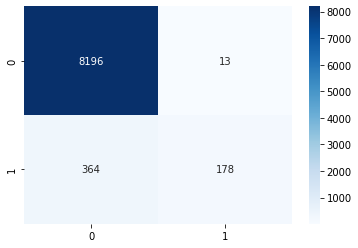

In [7]:
cf_matrix = confusion_matrix(true_labels, rfc_predictions)

accuracy = accuracy_score(true_labels, rfc_predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
print("TPR: {0:.3f}%".format(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1])))
print("FPR: {0:.3f}%".format(cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[1][0])))
print("AUC&ROC", roc_auc_score(true_labels, rfc_predictions))
print(classification_report(true_labels, rfc_predictions))

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))